<h2><b>Case Hype 2024_1</b></h2>
<h3><b>Introdução</b></h3>
<p> 
Os membros do grupo Hype estão sempre em busca de expandir seus horizontes. Cada integrante do grupo possui objetivos pessoais e profissionais únicos, mas todos compartilham o mesmo espírito de curiosidade e vontade de aprender.

Nas reuniões regulares do grupo, cada membro compartilha suas metas e aspirações. Alguns estão focados em aprimorar suas habilidades técnicas, mergulhando a fundo em linguagens de programação ou explorando novas tecnologias emergentes. Outros estão mais interessados em desenvolver suas habilidades de liderança e comunicação, buscando oportunidades para assumir projetos desafiadores e trabalhar em equipe.

Além dos objetivos individuais, os membros do grupo Hype também compartilham um objetivo comum: compreender melhor os dados relacionados aos salários dos profissionais de TI e as características que influenciam sua oscilação. Eles reconhecem a importância de entender como fatores como experiência profissional, modalidade de trabalho e tempo de empresa afetam os salários na indústria de tecnologia.

Eles estão determinados a explorar os dados em profundidade, identificar padrões significativos e desenvolver modelos preditivos que possam fornecer orientação e clareza em um mercado de trabalho em constante evolução. 
</p>

<h3><b>Sobre o conjunto de dados</b></h3>

<ol>
    <li><b>pais:</b> País residente</li>
    <li><b>continente:</b> Continente</li>
    <li><b>idade:</b> Idade atual</li>
    <li><b>faixa_idade:</b> Classificação de faixa etária</li>
    <li><b>modalidade_exercicio:</b> Modalidade de exercício das atividades de TI</li>
    <li><b>contrato_trabalho:</b> Contrato de trabalho, em relação ao período de trabalho</li>
    <li><b>sou_estudante:</b> Se atualmente é estudante ou não</li>
    <li><b>sou_aposentado:</b> Se está aposentado ou não</li>
    <li><b>sou_freelancer:</b> Se atual como freelancer ou não</li>
    <li><b>buscando_trabalho:</b> Se está buscando trabalho ou não</li>
    <li><b>nivel_educacao:</b> Nível de escolaridade</li>
    <li><b>intervalo_min_anos_exp_pessoal:</b> Intervalo mínimo de anos de contato/experiência total na área (não necessariamente profissional)</li>
    <li><b>intervalo_max_anos_exp_pessoal:</b> Intervalo máximo de anos de contato/experiência total na área (não necessariamente profissional)</li>
    <li><b>intervalo_min_anos_exp_profissional:</b> Intervalo mínimo de anos de experiência profissional total na área</li>
    <li><b>intervalo_max_anos_exp_profissional:</b> Intervalo máximo de anos de experiência profissional total na área</li>
    <li><b>anos_atividade_atual:</b> Anos de exerção da atividade atual (seja emprego, freelancer, etc.)</li>
    <li><b>categoria_salario:</b> O salário representado em categorias</li>
</ol>

<h3><b>Tarefas do Case</b></h3>

<p>No geral, as tarefas se concentram no estudo e na compreensão dos dados, seja por meio de uma análise descritiva dos dados e na modelagem de um classificador para ser capaz de prever uma categoria de salário dado as características.</p>

<p><b>As tarefas são dividas em 5 seções:</b></p>
<ul>
    <li><b>Descrição dos dados:</b> Responder algumas questões levantadas pelos membros do Hype. <b>(2,5)</b></li>
    <li><b>Visualização dos dados:</b> Representação visual de algumas variáveis para facilitar o entedimento. <b>(1,5)</b></li>
    <li><b>Processamento e transformação dos dados:</b> Algumas etapas que deverão preceder a etapa da modelagem. <b>(2,5)</b></li>
    <li><b>Preparação dos dados e treinamento de um modelo classificador:</b> Treinamento de um modelo pré-implementado que classifica a faixa salarial. <b>(2,0)</b></li>
    <li><b>Avaliação do modelo:</b> Calcular algumas métricas de avaliação no conjunto de teste. <b>(1,5)</b></li>
</ul>

<p><b>Editar somente onde estiver marcado como "TODO" na célula</b></p>

<h3>Bibliotecas</h3> 

<p>Importação de bibliotecas que possivelmente serão utilizados ao longo do case</p>

In [36]:
import sys
print(sys.executable)

c:\Python312\python.exe


In [72]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# =========== TODO (opcional) ===========
# insira outras bibliotecas caso seja necessário...
from scipy.stats import shapiro
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

<h3>Leitura dos dados</h3>

In [38]:
df = pd.read_parquet('dataset/final_case.parquet')

In [39]:
df.sample(5)

,pais,continente,idade,faixa_idade,modalidade_exercicio,contrato_trabalho,sou_estudante,sou_aposentado,sou_freelancer,buscando_trabalho,nivel_educacao,intervalo_min_anos_exp_pessoal,intervalo_max_anos_exp_pessoal,intervalo_min_anos_exp_profissional,intervalo_max_anos_exp_profissional,anos_atividade_atual,categoria_salario
84196,USA,North America,34.0,Adults,Hybrid,Full-time,Nao,Nao,Nao,Nao,Bachelor,5.0,8.0,1.0,4.0,1.0,High
23889,Germany,Europe,29.0,Adults,Remote,Unemployed,Nao,Nao,Nao,Nao,Masters,13.0,16.0,5.0,8.0,1.0,High
21642,Iran,Asia,46.0,Adults,In-person,Part-time,Nao,Nao,Nao,Nao,Bachelor,21.0,24.0,13.0,16.0,13.0,Mid
43544,Sweden,Europe,51.0,Adults,Hybrid,Full-time,Nao,Nao,Sim,Nao,Masters,33.0,36.0,17.0,20.0,14.0,Mid
31822,Bangladesh,Asia,31.0,Adults,Remote,Full-time,Nao,Nao,Nao,Nao,Self-Study,5.0,8.0,5.0,8.0,3.0,Low


<h3><b>Seção 1: Descrição dos dados (2,5)</b></h3>

<p><b>Materiais de apoio: </b></p> 
<li>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html</li>
<li>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html</li>
<li>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html</li>
<li>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html</li>
<li>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html</li>

<h4><b>Seção 1.1: Mostre o tipo de cada uma das colunas (0,5)</b></h4>

<p>É fundamental avaliar a corretude de tipagem das colunas de dados.</p>
<p><b>Por exemplo: </b> Avaliar se a coluna de 'pais' é uma string (texto) e a 'idade' é um int (número inteiro). </p>

In [40]:
# =========== TODO ===========
print(df.dtypes)

pais                                    object
continente                              object
idade                                  float64
faixa_idade                             object
modalidade_exercicio                    object
contrato_trabalho                       object
sou_estudante                           object
sou_aposentado                          object
sou_freelancer                          object
buscando_trabalho                       object
nivel_educacao                          object
intervalo_min_anos_exp_pessoal         float64
intervalo_max_anos_exp_pessoal         float64
intervalo_min_anos_exp_profissional    float64
intervalo_max_anos_exp_profissional    float64
anos_atividade_atual                   float64
categoria_salario                       object
dtype: object


<h4><b>Seção 1.2: Mostre a dimensão dos dados (0,5)</b></h4>

<p>Mostrar a quantidade de linhas e colunas a base possui.</p>

In [41]:
# =========== TODO ===========
num_linhas, num_colunas = df.shape
print("Número de linhas:", num_linhas)
print("Número de colunas:", num_colunas)

Número de linhas: 47916
Número de colunas: 17


<h4><b>Seção 1.3: Análise descritiva das colunas numéricas (0,5)</b></h4>

<p>Mostre algumas métricas gerais das colunas como a média, valor mínimo/máximo, contagem... (livre escolha)</p>

In [73]:
# =========== TODO ===========

### Calculando sobre a coluna 'Idade' ###

coluna = 'idade'

# Calculando as estatísticas 
media = df[coluna].mean()
minimo = df[coluna].min()
maximo = df[coluna].max()
desvio_padrao = df[coluna].std()
frequencia_absoluta = df[coluna].value_counts()

# Mostrando os resultados
print("=========== Para a coluna Idade ===========")
print(f"Média: {media}")
print(f"Valor mínimo: {minimo}")
print(f"Valor máximo: {maximo}")
print(f"Desvio padrão: {desvio_padrao}")
print(f"Contagem: {frequencia_absoluta}")


=========== Para a coluna Idade ===========
Média: 37.06041784302654
Valor mínimo: 16.0
Valor máximo: 79.0
Desvio padrão: 10.79156567316219
Contagem: idade
35.0    2149
34.0    2148
33.0    2146
31.0    2048
30.0    2020
        ... 
78.0      16
77.0      13
76.0       7
79.0       5
16.0       3
Name: count, Length: 64, dtype: int64


In [74]:
# =========== TODO ===========

### Calculando sobre a coluna 'anos_atividade_atual' ###

coluna = 'anos_atividade_atual'

# Calculando as estatísticas 
media = df[coluna].mean()
minimo = df[coluna].min()
maximo = df[coluna].max()
desvio_padrao = df[coluna].std()
frequencia_absoluta = df[coluna].value_counts()

# Mostrando os resultados
print("=========== Para a coluna anos_atividade_atual ===========")
print(f"Média: {media}")
print(f"Valor mínimo: {minimo}")
print(f"Valor máximo: {maximo}")
print(f"Desvio padrão: {desvio_padrao}")
print(f"Contagem: {frequencia_absoluta}")


=========== Para a coluna anos_atividade_atual ===========
Média: 5.141644185122446
Valor mínimo: 0.0
Valor máximo: 48.0
Desvio padrão: 5.635681804478812
Contagem: anos_atividade_atual
1.0     16523
2.0      4165
5.0      4155
3.0      4101
4.0      4095
6.0      1816
7.0      1802
9.0      1784
8.0      1772
10.0      931
13.0      882
11.0      853
12.0      843
16.0      470
14.0      464
15.0      445
17.0      436
21.0      255
20.0      240
19.0      236
18.0      218
0.0       191
22.0      176
23.0      141
24.0      133
25.0      129
29.0       78
27.0       76
28.0       64
26.0       61
31.0       46
30.0       42
33.0       37
32.0       31
35.0       25
36.0       21
34.0       18
37.0       15
41.0       14
38.0        7
40.0        6
45.0        5
39.0        5
44.0        3
43.0        2
42.0        2
48.0        1
46.0        1
47.0        1
Name: count, dtype: int64


<h4><b>Seção 1.4: Quais são os países distintos da base e a sua contagem? (0,5)</b></h4>

<p>A equipe precisa avaliar como está a distribuição dos países da base.</p>

In [45]:
# =========== TODO ===========

### Calculando sobre a coluna 'País' ###

coluna = 'pais'

# Contanto os valores, agrupando por termos iguais
contagem = df[coluna].value_counts()

# Mostrar os resultados
print("=========== Para a coluna País ===========")
print("Os países estão distribuídos da seguinte forma:")
print(contagem)

=========== Para a coluna País ===========
Os países estão distribuídos da seguinte forma:
pais
USA              11840
Germany           3966
UK                3535
Canada            2104
India             1865
                 ...  
Laos                 1
Tajikistan           1
Guyana               1
Liechtenstein        1
Sudan                1
Name: count, Length: 127, dtype: int64


<h4><b>Seção 1.5: Qual é a correlação entre a idade e o intervalo mínimo de anos de experiência profissional? (0,5)</b></h4>

<p>Colunas para analisar:</p>
<li>idade</li>
<li>intervalo_min_anos_exp_profissional</li>

In [46]:
# =========== TODO (Código) ===========

# Usando o teste de Shapiro-Wilk para verificar se os dados seguem uma curva normal, para usar o teste de correlação de Pearson e argumentar sobre

# Excluindo NaN de idade e intervalo_min_anos_exp_profissional
df_limpo = df.dropna(subset=['idade', 'intervalo_min_anos_exp_profissional'])

# Verificando se idade possui distribuição normal
stat, p = shapiro(df_limpo['idade'])
print('Estatísticas de Shapiro-Wilk para idade: {:.3f}, p-valor: {:.3f}'.format(stat, p))

# Verificando se intervalo_min_anos_exp_profissional possui distribuição normal
stat, p = shapiro(df_limpo['intervalo_min_anos_exp_profissional'])
print('Estatísticas de Shapiro-Wilk para intervalo_min_anos_exp_profissional: {:.3f}, p-valor: {:.3f}'.format(stat, p))

# =========== TODO (Preencher a resposta substituindo o 'None') ===========
correlacao = df_limpo['idade'].corr(df_limpo['intervalo_min_anos_exp_profissional']) 
print(f'A correlação entre idade e o intervalo_min_anos_exp_profissional é: {correlacao}')


# Foi usada a correlação de Pearson, e como o resultado foi próximo de 1 (além da sua normalidade), há uma correlação significativa, fortemente linear e positiva entre elas


c:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 47904.
  res = hypotest_fun_out(*samples, **kwds)


Estatísticas de Shapiro-Wilk para idade: 0.955, p-valor: 0.000
Estatísticas de Shapiro-Wilk para intervalo_min_anos_exp_profissional: 0.846, p-valor: 0.000
A correlação entre idade e o intervalo_min_anos_exp_profissional é: 0.8229832121438871


<h3><b>Seção 2: Visualização dos dados (1,5)</b></h3>

<p><i>Observação: "pyplot" está importado como "plt"</i></p>

<p><b>Materiais de apoio: </b></p> 
<li>https://mode.com/example-gallery/python_histogram</li>
<li>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html</li>
<li>https://www.tutorialspoint.com/python-plot-a-pie-chart-for-pandas-dataframe-with-matplotlib</li>
<li>https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/</li>

In [47]:
# EXEMPLO DE AGRUPAMENTO DA COLUNA, USANDO FAIXA DE IDADE
agrupado = df.groupby(by='faixa_idade').agg(contagem=('faixa_idade', 'count')).reset_index()
agrupado

,faixa_idade,contagem
0,Adults,40826
1,Seniors,2111
2,Youth,4970


<h4><b>Seção 2.1: Crie um gráfico de pizza da distribuição de nível de educação (0,75)</b></h4>

<p>A equipe julgou que uma representação visual do gráfico de pizza seria o mais adequado.</p>
<p><i>Sinta-se a vontade para personalizar da forma como preferir</i></p>

In [48]:
# =========== TODO (Agrupamento) ===========

agrupado = df.groupby(by='nivel_educacao').agg(contagem=('nivel_educacao', 'count')).reset_index()
agrupado

,nivel_educacao,contagem
0,Associate,1593
1,Bachelor,22500
2,High School,2165
3,Masters,13015
4,Professional,2289
5,School,221
6,Self-Study,5637
7,Something else,490


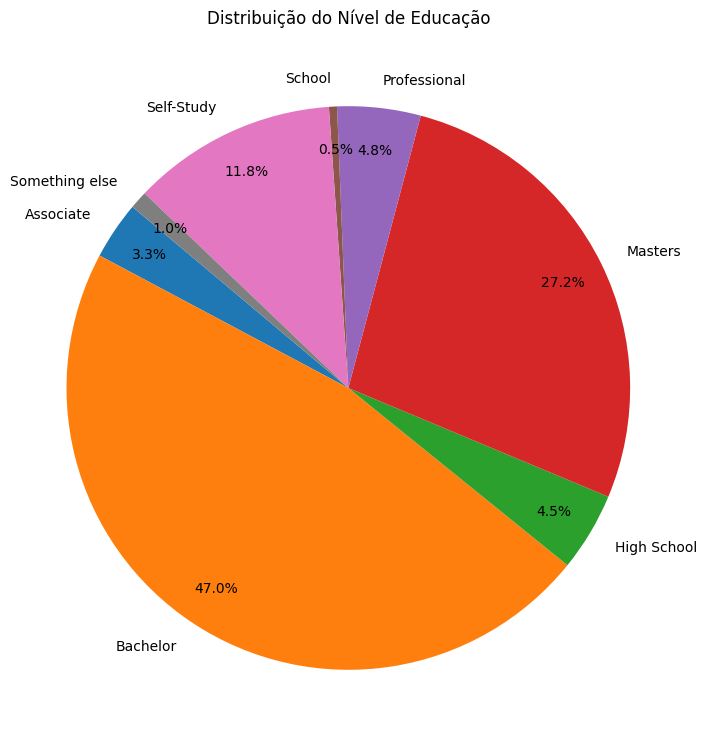

In [49]:
# =========== TODO (Gráfico) ===========

# Dados agrupados
nivel_educacao = agrupado['nivel_educacao']
contagem = agrupado['contagem']

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))

# Formatado como um número de ponto flutuante com uma casa decimal
plt.pie(contagem, labels=nivel_educacao, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Distribuição do Nível de Educação')
plt.axis('equal')  # Deixa o gráfico de pizza circular

# Ajustes
plt.subplots_adjust(top=1)

plt.show()

<h4><b>Seção 2.2: Crie um histograma de idade (0,75)</b></h4>

<p>A equipe necessita de um histograma para analisar como a idade está distribuída. Se possível, divida em 13 bins.</p>
<p><i>Sinta-se a vontade para personalizar da forma como preferir</i></p>

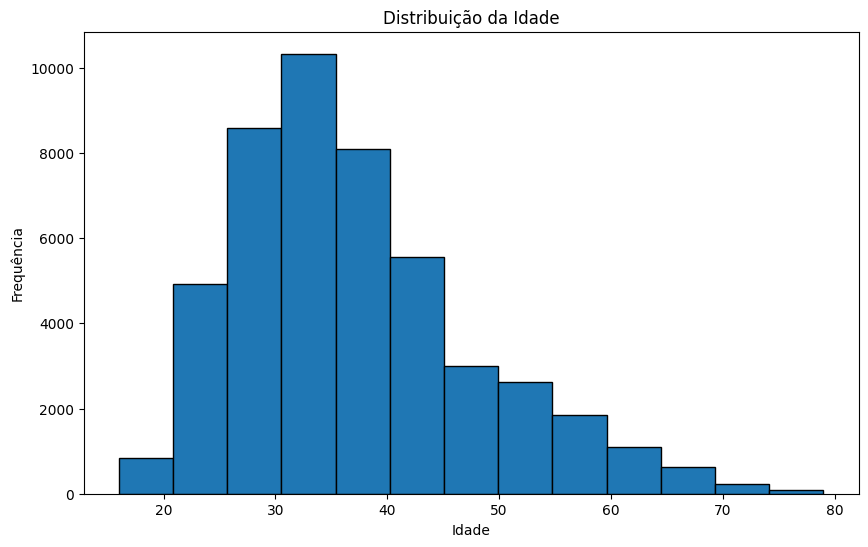

In [67]:
# =========== TODO (Gráfico) ===========

# Criando o histograma
plt.figure(figsize=(10, 6))

plt.hist(df['idade'], bins = 13, edgecolor='black')  # Definindo 13 bins
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.show()

<h3><b>Seção 3: Processamento e transformação dos dados (2,5)</b></h3>

<p><i>Observação: Normalmente os dados nulos são representados como NaN</i></p>

<p><b>Materiais de apoio: </b></p> 
<li>https://pandas.pydata.org/docs/dev/reference/api/pandas.DataFrame.isna.html</li>
<li>https://saturncloud.io/blog/how-to-count-nan-values-in-a-pandas-dataframe-column/</li>
<li>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html</li>
<li>https://www.datacamp.com/tutorial/python-select-columns</li>
<li>https://medium.com/codex/how-to-set-x-and-y-in-pandas-3f38584e9bed (abra na aba anônima)</li>
<li>https://www.alura.com.br/artigos/get-dummies-vs-onehotencoder-qual-metodo-escolher</li>
<li>https://www.c-sharpcorner.com/article/a-beginners-guide-to-one-hot-encoding-using-pandas-getdummies-method/</li>

<h4><b>Seção 3.1: Avalie integridade das colunas (0,5)</b></h4>

<p>Sempre há a necessidade de avaliar se a base de dados não possui dados nulos/vazios.</p>

In [51]:
# Verificar valores nulos em todas as colunas do DataFrame
valores_nulos_por_coluna = df.isnull().sum()
print("Valores nulos em cada coluna:\n", valores_nulos_por_coluna)

# Total de valores nulos no DataFrame
total_valores_nulos = df.isnull().sum().sum()
print("Total de valores nulos no DataFrame:", total_valores_nulos)

Valores nulos em cada coluna:
 pais                                   0
continente                             4
idade                                  4
faixa_idade                            9
modalidade_exercicio                   7
contrato_trabalho                      9
sou_estudante                          7
sou_aposentado                         7
sou_freelancer                         6
buscando_trabalho                      6
nivel_educacao                         6
intervalo_min_anos_exp_pessoal         7
intervalo_max_anos_exp_pessoal         7
intervalo_min_anos_exp_profissional    8
intervalo_max_anos_exp_profissional    5
anos_atividade_atual                   8
categoria_salario                      0
dtype: int64
Total de valores nulos no DataFrame: 100


<h4><b>Seção 3.2: Drop (não considerar) das linhas onde contém células nulas (0,5)</b></h4>

<p>A equipe decidiu que não deveríamos treinar o modelo com linhas onde há dado(s) inválido(s).</p>
<p><i>Dica: Você pode executar a célula anterior para avaliar se o código está correto.</i></p>

In [52]:
# =========== TODO ===========

# Remover todas as linhas com pelo menos um NaN em qualquer coluna
df = df.dropna()

# Verificar o novo tamanho do DataFrame para confirmar a remoção
print("Novo número de linhas no DataFrame:", df.shape[0])

# Verificando se os NaN foram excluidos, mesmo código da célula anterior
valores_nulos_por_coluna = df.isnull().sum()
print("Valores nulos em cada coluna:\n", valores_nulos_por_coluna)

total_valores_nulos = df.isnull().sum().sum()
print("Total de valores nulos no DataFrame:", total_valores_nulos)

Novo número de linhas no DataFrame: 47817
Valores nulos em cada coluna:
 pais                                   0
continente                             0
idade                                  0
faixa_idade                            0
modalidade_exercicio                   0
contrato_trabalho                      0
sou_estudante                          0
sou_aposentado                         0
sou_freelancer                         0
buscando_trabalho                      0
nivel_educacao                         0
intervalo_min_anos_exp_pessoal         0
intervalo_max_anos_exp_pessoal         0
intervalo_min_anos_exp_profissional    0
intervalo_max_anos_exp_profissional    0
anos_atividade_atual                   0
categoria_salario                      0
dtype: int64
Total de valores nulos no DataFrame: 0


<h4><b>Seção 3.3: Faça uma separação das características e a variável que desejamos prever (0,5)</b></h4>

<p>A equipe precisa que você quebre os dados em 'X' e 'y'.</p>
<p>Armazene como 'y' a coluna que desejamos prever (categoria_salario) e como 'X' as demais colunas.</p>

In [68]:
# =========== TODO ===========

# y será a Series contendo a coluna 'categoria_salario'
y = df['categoria_salario']

# X será o DataFrame contendo todas as colunas exceto 'categoria_salario'
X = df.drop('categoria_salario', axis=1)

# Verificando 5 linhas de X para garantir que categoria_salario foi excluida
print("Primeiras linhas de X:")
X.sample(5)


Primeiras linhas de X:


,pais,continente,idade,faixa_idade,modalidade_exercicio,contrato_trabalho,sou_estudante,sou_aposentado,sou_freelancer,buscando_trabalho,nivel_educacao,intervalo_min_anos_exp_pessoal,intervalo_max_anos_exp_pessoal,intervalo_min_anos_exp_profissional,intervalo_max_anos_exp_profissional,anos_atividade_atual
56115,France,Europe,26.0,Youth,In-person,Part-time,Sim,Nao,Nao,Nao,Masters,5.0,8.0,1.0,4.0,1.0
46747,Philippines,Asia,22.0,Youth,Hybrid,Full-time,Nao,Nao,Nao,Nao,Bachelor,5.0,8.0,1.0,4.0,1.0
71368,Canada,North America,50.0,Adults,Hybrid,Full-time,Nao,Nao,Nao,Nao,Bachelor,25.0,28.0,17.0,20.0,1.0
33433,USA,North America,47.0,Adults,Remote,Full-time,Nao,Nao,Nao,Nao,Masters,17.0,20.0,9.0,12.0,2.0
15542,Turkey,Asia,31.0,Adults,Remote,Full-time,Nao,Nao,Nao,Nao,Masters,1.0,4.0,1.0,4.0,1.0


<h4><b>Seção 3.4: Aplique um label encoding da variável ('y') que desejamos prever (0,5)</b></h4>

<p>Transforme a coluna categórica em numérica, representando as diferentes classes (categorias de salário)</p>
<p><b>Exemplo:</b> 'Low' como 0, 'Mid' como 1...</p>

In [54]:
# =========== TODO ===========

mapeamento_salario = {
    'Low': 0,
    'Mid': 1,
    'High': 2,
    'Very High': 3
}

# Aplicando o mapeamento para transformar as categorias em números
y = y.map(mapeamento_salario)

# Verificando
y.sample(5)

53172    1
87572    1
71890    0
73795    3
30547    3
Name: categoria_salario, dtype: int64

<h4><b>Seção 3.5: Aplique um one-hot-encoding das características ('X') categóricas (0,5)</b></h4>

<p>Transforme as colunas categóricas em numérica por meio de one-hot-encoding.</p>

In [55]:
# =========== TODO ===========

# Aplicando one-hot-encoding às características categóricas em X
X = pd.get_dummies(X, dtype=int)

# Verificando linhas de X para garantir que a transformação foi aplicada corretamente
print("Pegando 5 linhas aleatórias do dataframe X atualizado:")
X.sample(5)

Pegando 5 linhas aleatórias do dataframe X atualizado:


,idade,intervalo_min_anos_exp_pessoal,intervalo_max_anos_exp_pessoal,intervalo_min_anos_exp_profissional,intervalo_max_anos_exp_profissional,anos_atividade_atual,pais_Afghanistan,pais_Africa,pais_Albania,pais_Andorra,...,sou_freelancer_Sim,buscando_trabalho_Nao,nivel_educacao_Associate,nivel_educacao_Bachelor,nivel_educacao_High School,nivel_educacao_Masters,nivel_educacao_Professional,nivel_educacao_School,nivel_educacao_Self-Study,nivel_educacao_Something else
36972,64.0,37.0,40.0,25.0,28.0,22.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
85472,32.0,5.0,8.0,1.0,4.0,1.0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7599,36.0,17.0,20.0,9.0,12.0,9.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
44762,44.0,21.0,24.0,17.0,20.0,15.0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
78530,33.0,9.0,12.0,5.0,8.0,5.0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


<h3><b>Seção 4: Preparação dos dados e treinamento de um modelo classificador (2,0)</b></h3>

<p><b>Materiais de apoio: </b></p> 
<li>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html</li>
<li>https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/</li>

In [56]:
# # EXECUTE ESSA CÉLULA CASO NÃO TENHA CONCLUÍDO A SEÇÃO 3, PARA OBTER O 'X' E 'y'
# X = pd.read_parquet('dataset/final_case_X.parquet')
# y = pd.read_parquet('dataset/final_case_y.parquet').categoria_salario

<h4><b>Seção 4.1: Faça a divisão dos dados de treinamento e teste (0,75)</b></h4>

<p>Queremos testar como o modelo performa com os dados desconhecidos, portanto vamos separar uma parte dos dados para o teste!</p>
<p>Depois de uma reunião, nós decidimos optar em dividir os dados para <b>80% de treinamento e 20% de teste.</b></p>

In [57]:
# =========== TODO ===========

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20)


# Verificando
print("Dados de Treinamento X:")
print(X_treino)
print("\nLabels de Treinamento y:")
print(y_treino)
print("\nDados de Teste X:")
print(X_teste)
print("\nLabels de Teste y:")
print(y_teste)

# Verificando o shape de X_treino e X_teste

X_treino.shape, X_teste.shape

Dados de Treinamento X:
       idade  intervalo_min_anos_exp_pessoal  intervalo_max_anos_exp_pessoal  \
3986    33.0                             9.0                            12.0   
48605   33.0                             5.0                             8.0   
19137   33.0                            17.0                            20.0   
1441    29.0                             9.0                            12.0   
5912    21.0                             5.0                             8.0   
...      ...                             ...                             ...   
60803   30.0                             9.0                            12.0   
34895   64.0                            45.0                            48.0   
997     41.0                            13.0                            16.0   
84748   21.0                             1.0                             4.0   
42901   39.0                            13.0                            16.0   

       interval

((38253, 164), (9564, 164))

<h4><b>Seção 4.2: Construa um classificador com os dados de treinamento (0,75)</b></h4>

<p>A equipe precisa de um modelo para utilizar como um baseline, mesmo que seja com os parâmetros padrões. Para isso, crie uma instância de modelo e faça inicie um treinamento com os dados de treino.</p>
<p><i>Fique à vontade para escolher o modelo que preferir, nós importamos o <b>RandomForestClassifier</b> e <b>DecisionTreeClassifier</b> como exemplos de uso.</i></p>

In [70]:
# =========== TODO ===========

model = RandomForestClassifier()

model.fit(X_treino, y_treino)

# Verificar os atributos depois de treinar o modelo
print("Profundidade da árvore:", len(model.estimators_))
print("Número de features:", model.n_features_in_)
print("Classes:", model.classes_)

Profundidade da árvore: 100
Número de features: 164
Classes: [0 1 2 3]


<h4><b>Seção 4.3: Teste o modelo com os dados de teste (0,5)</b></h4>

<p>Utilize os dados de teste que foram separados na seção 4.1, nós precisamos avaliar com os dados que não foram utilizados na seção 4.2!</p>
<p>Armazene o retorno do modelo em uma variável.</p>

In [59]:
# =========== TODO ===========

y_pred = model.predict(X_teste)

print(y_pred)

[0 2 1 ... 1 2 0]


<h4><b>Seção 4.1, 4.2 e 4.3: Faço o splitting dos dados, treine e teste um classificador (2,0)</b></h4>

<p><b>Não precisa realizar esse TODO caso tenha feito as seções 4.1, 4.2 e 4.3 (OPCIONAL). Será considerado apenas a pontuação de uma delas.</b></p>
<p>O time decidiu que você poderia desenvolver um modelo mais robusto, caso queira demonstrar suas habilidades!</p>
<p>Sinta-se à vontade para treinar outros classificadores, aplicar técnicas de validações cruzadas, realizar o tuning de hiperparâmetros e entre outros!</p> 

In [60]:
# =========== TODO ===========



<h3><b>Seção 5: Avaliação do modelo (1,5)</b></h3>

<p><b>Materiais de apoio: </b></p> 
<li>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html</li>
<li>https://scikit-learn.org/stable/modules/model_evaluation.html</li>

In [61]:
# # EXECUTE ESSA CÉLULA CASO QUEIRA REALIZAR A SEÇÃO 5 MAS NÃO TENHA CONCLUÍDO A SEÇÃO 4, PARA OBTER UM EXEMPLO DE SAÍDA DA SEÇÃO 4.3
# y_test = np.load('dataset/exemplo_y_test.npy')      # labels do y_test (real)
# y_pred = np.load('dataset/exemplo_y_pred.npy')      # labels da saída do modelo (previsto)
# labels = [1, 2, 0, 3]
# target_names = ['Low', 'Mid', 'High', 'Very High']

<h4><b>Seção 5.1: Faça uma avaliação da saída do modelo com os dados de teste (1,5)</b></h4>

<p>Utilizem representações como matriz de confusão e principais métricas como acurácia, revocação, f1-score...</p>

In [65]:
# =========== TODO ===========

# Matriz de Confusão
conf_matrix = confusion_matrix(y_teste, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)


# Acurácia
accuracy = accuracy_score(y_teste, y_pred)
print("Acurácia:", accuracy)

# Precisão
precision = precision_score(y_teste, y_pred, average='weighted')
print("Precisão:", precision)

# Recall
recall = recall_score(y_teste, y_pred, average='weighted')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_teste, y_pred, average='weighted')
print("Pontuação F1:", f1)

Matriz de Confusão:
[[1596  534  150   61]
 [ 547 1168  575  174]
 [ 183  653  911  639]
 [  88  200  549 1536]]
Acurácia: 0.5448557089084065
Precisão: 0.5417564257064941
Recall: 0.5448557089084065
Pontuação F1: 0.5430257077910345


<h5><b>Análise dos resultados</b></h5>

<p>Sobre a matriz de confusão, todas da diagonal principal que representa os resultados verdadeiros são numericamente maiores que os outros, com exceção da linha 3 (que representa os dados High com i = 2). Se confunde mais nos intermediários</p>
<p>Conclusão: talvez não seja o melhor modelo ou deve ser feito ajustes</p>

<p>Sobre a acurácia e recall, os dois valores deram exatamente iguais, o que é extremamemnte estranho, aconteceu isso tanto com o RandomForestClassifier quanto com o DecisionTreeClassifier. Talvez tenha algum problema com os dados, mas não consegui resolver. </p>